In [73]:
# AIT 664-DL2
# Andrej Paskalov - Data Specialist - "The Data Doctor"
# Greeshma Priya Pendiyala - Model Expert - "AI Architect"
# Spoogmy Ahmad - Project Lead - "Captain Data"
# Group 8
# Analysis and Future Predictions of the US Dollar Value, Imports/Exports and Trade Balances


In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [77]:
# Reading the file (test)
dataset = pd.read_excel(r'C:\Users\Andrej\exhibit_history.xlsx')
#dataset
print(dataset.head())

  U.S. International Trade in Goods and Services and Inflation Rate, 1992 - Present   \
0  In millions of dollars. Seasonally adjusted; d...                                   
1                                                NaN                                   
2                                             Period                                   
3                                               1992                                   
4                                               1992                                   

  Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN    Balance        NaN        NaN    Exports        NaN   
2      Total  Goods (1)   Services      Total  Goods (1)   Services   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4     -39212     -96897      57685     616882     439631     177251   

  Unnamed: 7 Unnamed: 8 Unnamed: 9 Unnamed: 

In [79]:
# Load the dataset
file_path = r"C:\Users\Andrej\exhibit_history.xlsx"
dataset = pd.read_excel(file_path)

# Display basic information and first few rows
dataset.info(), dataset.head()

# Reload the dataset with proper headers (starting from row 2)
dataset = pd.read_excel(file_path, skiprows=2)
pd.set_option('display.max_rows', None) 

# Rename columns for clarity
dataset.columns = [
    "Period", "Balance_Total", "Balance_Goods", "Balance_Services",
    "Exports_Total", "Exports_Goods", "Exports_Services",
    "Imports_Total", "Imports_Goods", "Imports_Services",
    "Year", "Amount", "Inflation_Rate"
]

# Drop any fully empty rows
dataset = dataset.dropna(how='all')

# Convert numeric columns to appropriate types (ignoring errors for now)
numeric_cols = dataset.columns[1:]  # All except "Period"
dataset[numeric_cols] = dataset[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Filter out rows where "Amount" or "Inflation_Rate" are NaN but keep all other rows
dataset_cleaned = dataset.dropna(subset=["Amount", "Inflation_Rate"])

# Display cleaned data info and cleaned dataset with the desired rows
dataset_cleaned.info()
dataset_cleaned


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 13 columns):
 #   Column                                                                              Non-Null Count  Dtype 
---  ------                                                                              --------------  ----- 
 0   U.S. International Trade in Goods and Services and Inflation Rate, 1992 - Present   480 non-null    object
 1   Unnamed: 1                                                                          433 non-null    object
 2   Unnamed: 2                                                                          434 non-null    object
 3   Unnamed: 3                                                                          434 non-null    object
 4   Unnamed: 4                                                                          433 non-null    object
 5   Unnamed: 5                                                                          434 non-null    object

,Period,Balance_Total,Balance_Goods,Balance_Services,Exports_Total,Exports_Goods,Exports_Services,Imports_Total,Imports_Goods,Imports_Services,Year,Amount,Inflation_Rate
2,1992,-39212.0,-96897.0,57685.0,616882.0,439631.0,177251.0,656094.0,536528.0,119566.0,1992.0,11.13,0.03
16,1993,-70311.0,-132451.0,62141.0,642863.0,456943.0,185920.0,713174.0,589394.0,123780.0,1993.0,11.47,0.03
30,1994,-98493.0,-165831.0,67338.0,703254.0,502859.0,200395.0,801747.0,668690.0,133057.0,1994.0,11.76,0.03
44,1995,-96384.0,-174170.0,77786.0,794387.0,575204.0,219183.0,890771.0,749374.0,141397.0,1995.0,12.10,0.03
58,1996,-104065.0,-191000.0,86935.0,851602.0,612113.0,239489.0,955667.0,803113.0,152554.0,1996.0,12.45,0.03
72,1997,-108273.0,-198428.0,90155.0,934453.0,678366.0,256087.0,1042726.0,876794.0,165932.0,1997.0,12.74,0.02
86,1998,-166140.0,-248221.0,82081.0,933174.0,670416.0,262758.0,1099314.0,918637.0,180677.0,1998.0,12.94,0.02
100,1999,-255808.0,-337067.0,81258.0,976526.0,698525.0,278001.0,1232334.0,1035592.0,196742.0,1999.0,13.22,0.02
114,2000,-369685.0,-446781.0,77096.0,1082963.0,784940.0,298023.0,1452648.0,1231721.0,220927.0,2000.0,13.67,0.03
128,2001,-360373.0,-422370.0,61997.0,1015366.0,731331.0,284035.0,1375739.0,1153700.0,222039.0,2001.0,14.06,0.03


In [81]:
# Rename columns for clarity
dataset.columns = [
    "Period", "Balance_Total", "Balance_Goods", "Balance_Services",
    "Exports_Total", "Exports_Goods", "Exports_Services",
    "Imports_Total", "Imports_Goods", "Imports_Services",
    "Year", "Amount", "Inflation_Rate"
]

# Drop any fully empty rows
dataset = dataset.dropna(how='all')

# Convert numeric columns to appropriate types (ignoring errors for now)
numeric_cols = dataset.columns[1:]  # All except "Period"
dataset[numeric_cols] = dataset[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Filter out rows where "Amount" or "Inflation_Rate" are NaN but keep all other rows
dataset_cleaned = dataset.dropna(subset=["Amount", "Inflation_Rate"])

# Summary statistics and missing values
summary_stats = dataset_cleaned.describe()
missing_values = dataset_cleaned.isnull().sum()

summary_stats, missing_values


(       Balance_Total  Balance_Goods  Balance_Services  Exports_Total  \
 count      34.000000   3.400000e+01         34.000000   3.400000e+01   
 mean  -468082.558824  -6.210490e+05     152966.411765   1.672618e+06   
 std    257687.078042   3.204406e+05      96003.107602   8.105451e+05   
 min   -944762.000000  -1.212989e+06      25385.000000   2.698190e+05   
 25%   -642977.500000  -8.296692e+05      68942.500000   9.789185e+05   
 50%   -493509.000000  -7.207690e+05     112561.000000   1.626802e+06   
 75%   -281949.250000  -3.583928e+05     257808.250000   2.305035e+06   
 max    -39212.000000  -9.689700e+04     300155.000000   3.190606e+06   
 
        Exports_Goods  Exports_Services  Imports_Total  Imports_Goods  \
 count   3.400000e+01      3.400000e+01   3.400000e+01   3.400000e+01   
 mean    1.145022e+06      5.275968e+05   2.140701e+06   1.766071e+06   
 std     5.283869e+05      2.851195e+05   1.026065e+06   8.320322e+05   
 min     1.727790e+05      9.704000e+04   4.01201

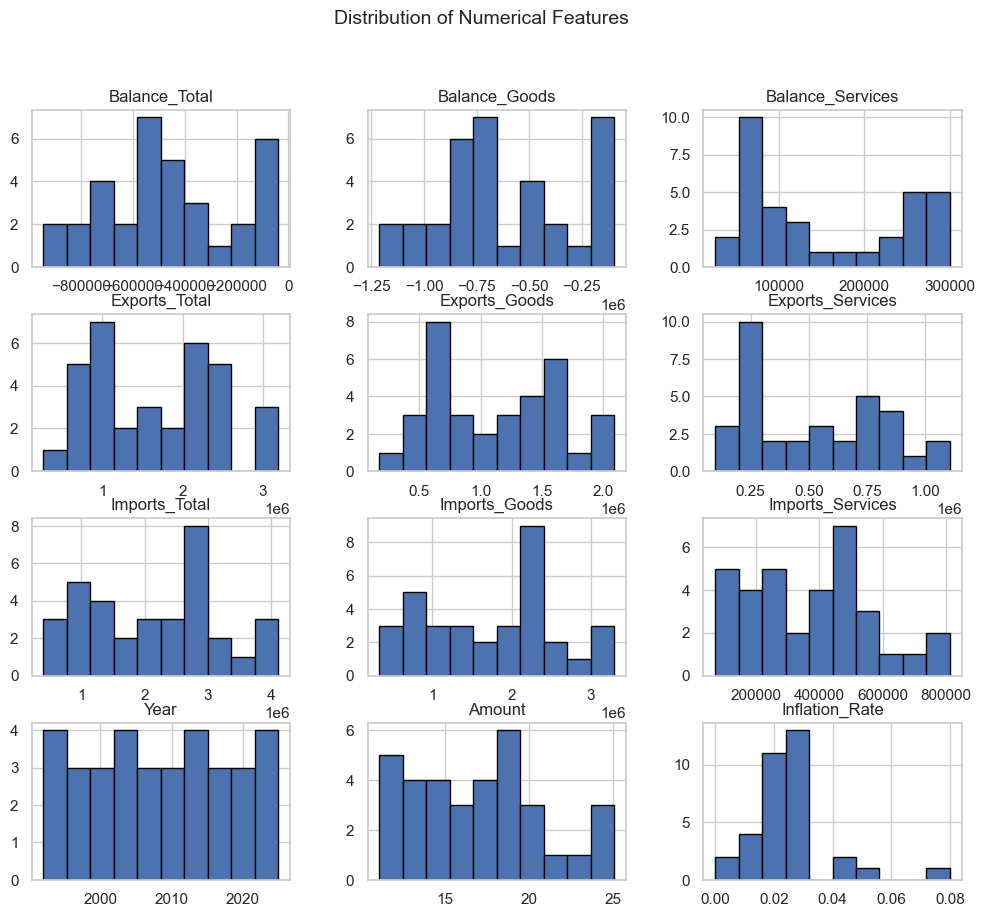

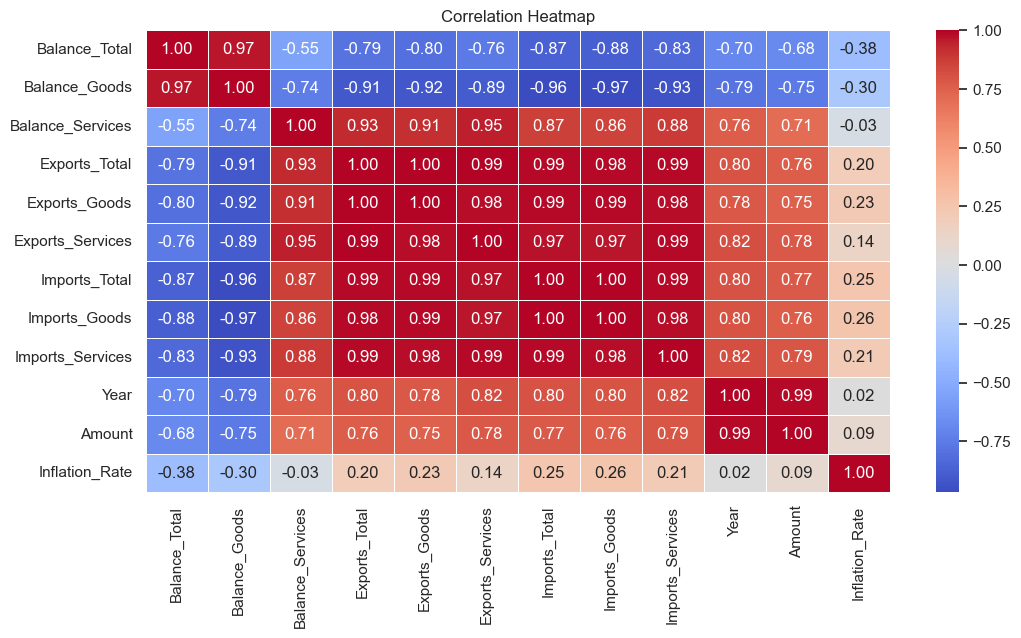

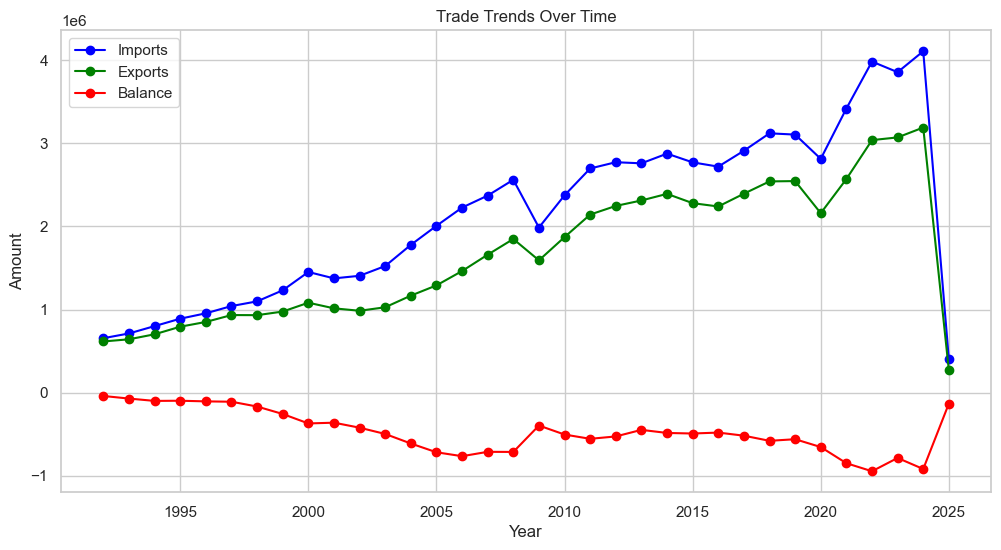

In [83]:
# Set style
import seaborn as sns
sns.set(style="whitegrid")

# Histogram for numerical variables
dataset_cleaned[numeric_cols].hist(figsize=(12, 10), bins=10, edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=14)
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(dataset_cleaned[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Line plot for trends over time (Year vs Imports, Exports, and Balance)
plt.figure(figsize=(12, 6))
plt.plot(dataset_cleaned["Year"], dataset_cleaned["Imports_Total"], label="Imports", marker='o', color='blue')
plt.plot(dataset_cleaned["Year"], dataset_cleaned["Exports_Total"], label="Exports", marker='o', color='green')
plt.plot(dataset_cleaned["Year"], dataset_cleaned["Balance_Total"], label="Balance", marker='o', color='red')

plt.xlabel("Year")
plt.ylabel("Amount")
plt.title("Trade Trends Over Time")
plt.legend()
plt.grid(True)
plt.show()


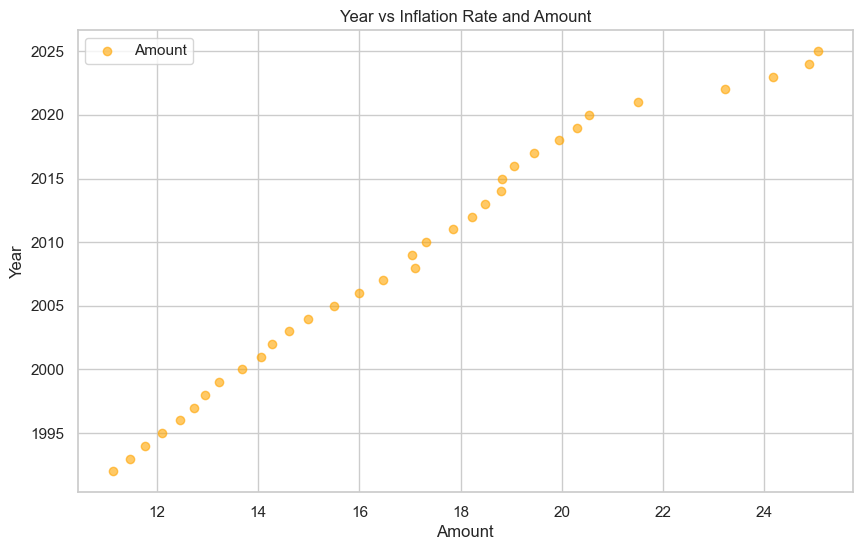

In [84]:
import seaborn as sns
# Create the second scatter plot (Year vs Inflation Rate and Amount)
plt.figure(figsize=(10, 6))
#plt.scatter(dataset_cleaned["Inflation_Rate"], dataset_cleaned["Year"], c="purple", label="Inflation Rate", alpha=0.6)
plt.scatter(dataset_cleaned["Amount"], dataset_cleaned["Year"], c="orange", marker='o', linestyle='-', label="Amount", alpha=0.6)

# Labels and title
plt.xlabel('Amount')
plt.ylabel('Year')
plt.title('Year vs Inflation Rate and Amount')
plt.legend()
plt.grid(True)
# Show the plot
plt.show()


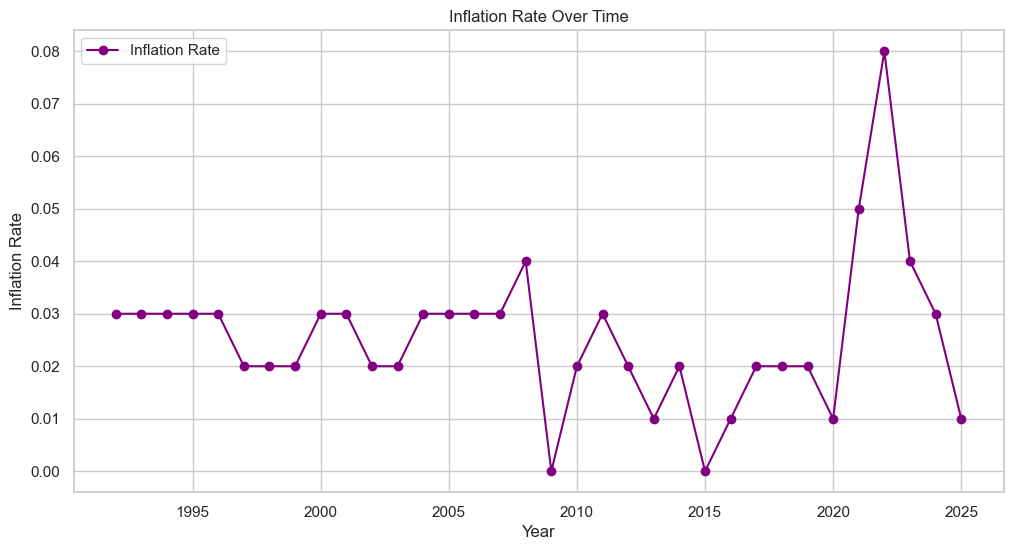

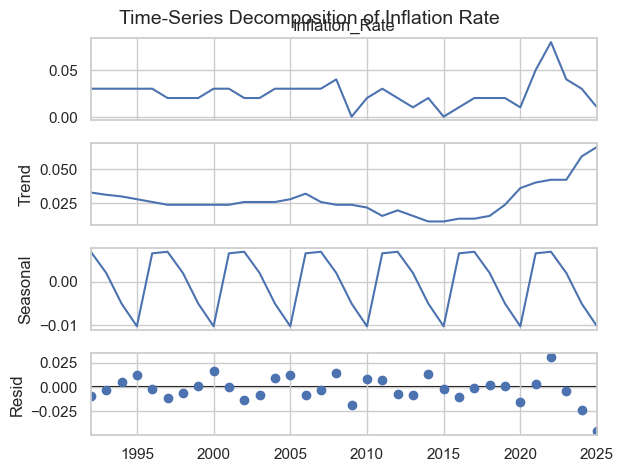

In [85]:
import statsmodels.api as sm

# Sort dataset by Year
dataset_cleaned = dataset_cleaned.sort_values(by="Year")

# Plot Inflation Rate over time
plt.figure(figsize=(12, 6))
plt.plot(dataset_cleaned["Year"], dataset_cleaned["Inflation_Rate"], marker='o', linestyle='-', color='purple', label="Inflation Rate")

plt.xlabel("Year")
plt.ylabel("Inflation Rate")
plt.title("Inflation Rate Over Time")
plt.legend()
plt.grid(True)
plt.show()

# Decomposing the time series to observe trend, seasonality, and residuals
inflation_series = dataset_cleaned.set_index("Year")["Inflation_Rate"]
decomposition = sm.tsa.seasonal_decompose(inflation_series, period=5, model="additive", extrapolate_trend="freq")

# Plot decomposition
decomposition.plot()
plt.suptitle("Time-Series Decomposition of Inflation Rate \n", fontsize=14)
plt.show()
